In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
filepath_home= 'D:/Dacon_Psychological_disposition/'
filepath_out = 'C:/임시/Dacon_Psychological_disposition/' 
train = pd.read_csv(filepath_home+'train_preprocessed.csv')
test = pd.read_csv(filepath_home+'test_preprocessed.csv')

In [3]:
# 마키아 스코어 계산
total_negative_cols = ["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]
train[total_negative_cols] = 6-train[total_negative_cols]
train['mach_score'] = train.apply(lambda x:x.iloc[0:40:2].mean(),axis=1)

In [4]:
# tipi 성격 구분 5 칼럼 추가
train[['tp02','tp04','tp06','tp08','tp10']]= 6-train[['tp02','tp04','tp06','tp08','tp10']]

train['Extraversion']=(train.tp01+train.tp06)/2
train['Agreeableness']=(train.tp02+train.tp07)/2
train['Conscientiousness']=(train.tp03+train.tp08)/2
train['Emotional Stability']=(train.tp04+train.tp09)/2
train['Openness to Experiences']=(train.tp05+train.tp10)/2

In [5]:
# 각 답변 시간을 빠르다/느리다 로 이분화 후 전체 설문의 답변시간을 0~20 사이로 수치화
total_median = np.median(np.ravel(train.iloc[:,1:40:2]))
train.iloc[:,1:40:2] = np.where(train.iloc[:,1:40:2]>total_median,1,0)
train['Q_total_E'] = train.iloc[:,1:40:2].sum(axis=1) # 0~20

# 손잡이와 교육 수준과의 관계

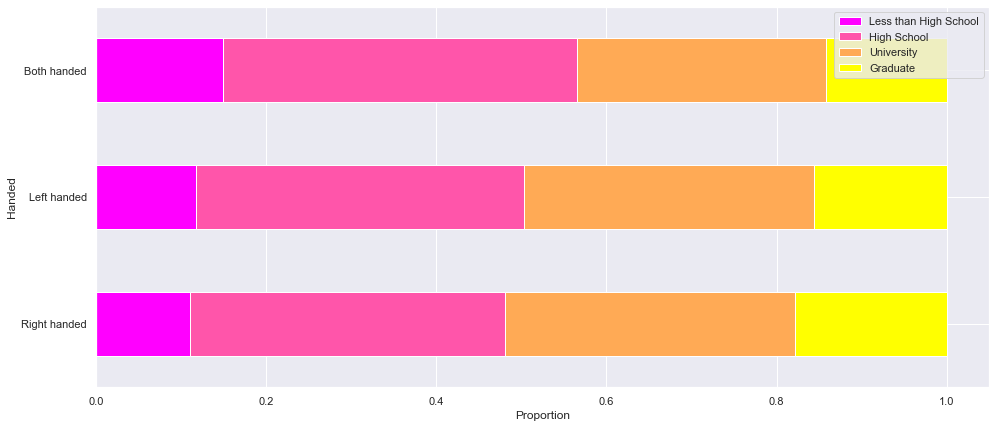

In [35]:
fig ,ax = plt.subplots(figsize=(10,6))
train.groupby(['hand'])['education'].value_counts(normalize=True).unstack().plot(kind='barh',
                                                                                stacked=True,
                                                                                figsize=(16,7),
                                                                                ax=ax,
                                                                                colormap='spring')
ax.set_yticklabels(['Right handed','Left handed','Both handed'])
ax.set_xlabel('Proportion')
ax.set_ylabel('Handed')
ax.legend(['Less than High School','High School','University','Graduate'])

- 오른손->왼손->양손잡이로 갈수록 교육 수준의 중심이 낮은쪽으로 이동하는 것을 확인할 수 있다.

# 2. 손잡이와 답변시간 (성별)사이의 관계

Text(0, 0.5, 'Total answer time')

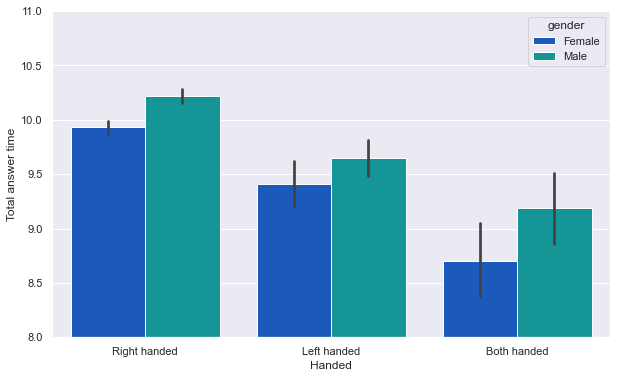

In [33]:
fig ,ax = plt.subplots(figsize=(10,6))
ax.set_ylim(8,11)
sns.barplot(data=train,x='hand',y='Q_total_E',palette='winter',hue='gender',ax=ax)
ax.set_xticklabels(['Right handed','Left handed','Both handed'])
ax.set_xlabel('Handed') 
ax.set_ylabel('Total answer time')

# Todo
- 4번 poc : 클러스터링 (노용철)
- 심화 poc -> 정리된 세부 주제에서 하나 더 깊이 들어가서 분석할 수 있는 내용
- Preprocessing : scaling, labeling , encoding , feature-adding
- ML : auto -ML 패키지 이용 가능하면 좋고
- 발표 / 제출 자료 작성 시작
- 발표자 + 대본